In [26]:
import numpy as np
import pandas as pd 
import os
from sklearn.preprocessing import MinMaxScaler 
import cv2 
import matplotlib.pyplot as plt 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
 from skimage.filters import roberts, sobel

In [28]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [44]:
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd

In [109]:
dir=r"C:\Users\Lenovo\Downloads\archive (1)\Training"
categories=['pituitary','notumor','meningioma','glioma']
data = []
df = []
for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        l_img = cv2.imread(imgpath,0)
        try:
            l_img=cv2.resize(l_img,(50,50))
            image = np.array(l_img).flatten()
            edges = cv2.Canny(l_img, 100,200)   
            edges1 = np.array(edges).flatten().reshape(-1)
            edge_sobel = sobel(l_img)
            edge_sobel1 = edge_sobel.reshape(-1)
            edge_scharr = scharr(l_img)
            edge_scharr1 = edge_scharr.reshape(-1)
            edge_prewitt = prewitt(l_img)
            edge_prewitt1 = edge_prewitt.reshape(-1)
            data.append([image,label])
             
            gaussian_img = nd.gaussian_filter(img, sigma=3)
            gaussian_img1 = gaussian_img.reshape(-1)
            gaussian_img2 = nd.gaussian_filter(img, sigma=7)
            gaussian_img3 = gaussian_img2.reshape(-1)
            
            median_img = nd.median_filter(img, size=3)
            median_img1 = median_img.reshape(-1)

           
        except Exception as e:
            pass
        df.append([image,edges1,edge_sobel1,edge_scharr1,edge_prewitt1,label])
print(len(data))

5712


In [111]:
dataframe = pd.DataFrame(df,columns=["image","canny","edge_sobel","edge_scharr","prewitt","label"])

In [112]:
dataframe.head()

,image,canny,edge_sobel,edge_scharr,prewitt,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,"[3, 3, 3, 3, 4, 4, 5, 5, 5, 4, 7, 4, 6, 7, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.013189827497131086, 0.011805484881168915, 0...","[0.013355032084142427, 0.011623436962136644, 0...","[0.012973485778613857, 0.01205169210103645, 0....",0
3,"[1, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 5, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.019336355807172568, 0.015501361079256759, 0...","[0.019548009197637658, 0.015978437267653547, 0...","[0.019055398349167644, 0.014904253922864548, 0...",0
4,"[1, 3, 3, 3, 4, 4, 3, 5, 5, 5, 5, 4, 4, 4, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.019336355807172568, 0.016316977428522783, 0...","[0.019548009197637658, 0.016603470151411708, 0...","[0.019055398349167644, 0.01595628185063229, 0....",0


In [115]:

dataframe.to_csv('features.csv')

In [48]:
import pickle

In [49]:
pick_in = open('brain3.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [51]:
pick_in = open('brain3.pickle','rb')
ct = pickle.load(pick_in)
pick_in.close()

In [52]:
import random

features = []
labels = []

for feature ,label in data:
    features.append(feature)
    labels.append(label)

In [53]:
from sklearn.model_selection import train_test_split
labels = np.array(labels)
features = np.array(features)

In [54]:
x_train,x_test,y_train,y_test = train_test_split(features ,labels, test_size=0.2 )

In [55]:
from sklearn.svm import SVC

In [56]:
svcmodel = SVC(C=1,kernel='poly',gamma='auto')

svcmodel.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [57]:
y_pred=svcmodel.predict(x_test)

In [58]:
svcmodel.score(x_test,y_test)

0.8923884514435696

In [59]:
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       276
           1       0.93      0.90      0.92       291
           2       0.87      0.79      0.83       315
           3       0.87      0.91      0.89       261

    accuracy                           0.89      1143
   macro avg       0.89      0.90      0.89      1143
weighted avg       0.89      0.89      0.89      1143



In [61]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[271   0   3   2]
 [  8 263  14   6]
 [ 18  20 249  28]
 [  3   0  21 237]]


In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pred=logreg.predict(x_test)
logreg.score(x_test,y_test)

0.799650043744532

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       276
           1       0.90      0.90      0.90       291
           2       0.72      0.64      0.67       315
           3       0.70      0.74      0.72       261

    accuracy                           0.80      1143
   macro avg       0.80      0.80      0.80      1143
weighted avg       0.80      0.80      0.80      1143



In [70]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import os
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

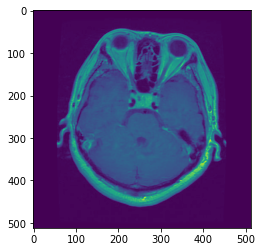

In [71]:
image = plt.imread(r'C:\Users\Lenovo\Downloads\archive (1)\Training\pituitary\Tr-pi_1348.jpg')
image.shape
plt.imshow(image)

In [75]:
image = cv2.imread(r"C:\Users\Lenovo\Downloads\archive (1)\Training\pituitary\Tr-pi_1348.jpg")
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

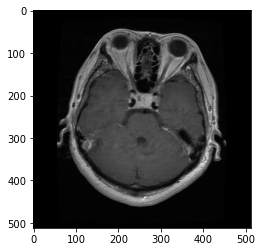

In [76]:
plt.imshow(image)
plt.imshow(grayscale, cmap="gray")

In [78]:
gray = rgb2gray(image)

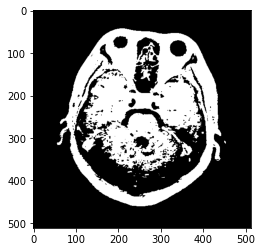

In [79]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

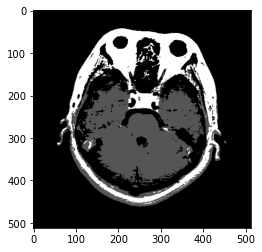

In [80]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [81]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [82]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

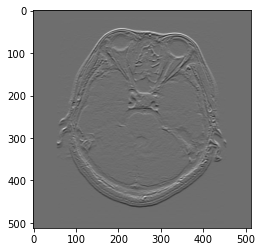

In [85]:
plt.imshow(out_h, cmap='gray')

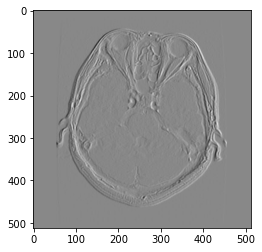

In [86]:
plt.imshow(out_v, cmap='gray')

In [87]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


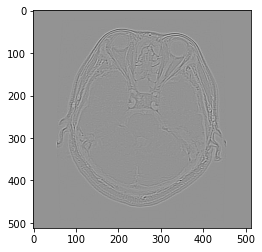

In [88]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

(512, 512)


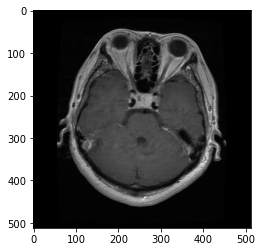

In [95]:
pic = plt.imread(r"C:\Users\Lenovo\Downloads\archive (1)\Training\pituitary\Tr-pi_1348.jpg")/255
print(pic.shape)
plt.imshow(pic, cmap='gray')

In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=25, random_state=0).fit(pic)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

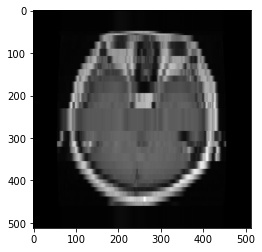

In [99]:
plt.imshow(pic2show,cmap='gray')